## Data Quality Checking

In [1]:
import sys
sys.path.append('../')
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from scripts.db_utils import connect, sql_to_dataframe
from src.data_quality_checks import check_missing_data, check_duplicates, check_data_types, check_numeric_anomalies, get_numeric_columns, get_total_missing_percentage
from src.utils import bytes_to_gigabytes, kilobytes_per_second_to_megabytes_per_second, milliseconds_to_hours, milliseconds_to_minutes



In [2]:
#opening the connection
conn = connect()

query = """ SELECT * FROM public.xdr_data  """

#loading our dataframe
df = sql_to_dataframe(conn, query)

#closing the connection
conn.close()

# Let’s see if we loaded the df successfully
df.head()

Connecting..
All good, Connection successful!


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [3]:
# checking for missing value in each columns
missing_data_summary = check_missing_data(df)
print(missing_data_summary)

                                 Column Name  Missing Values
0                                  Bearer Id             991
1                                      Start               1
2                                   Start ms               1
3                                        End               1
4                                     End ms               1
5                                  Dur. (ms)               1
6                                       IMSI             570
7                              MSISDN/Number            1066
8                                       IMEI             572
9                         Last Location Name            1153
10                           Avg RTT DL (ms)           27829
11                           Avg RTT UL (ms)           27812
12                   Avg Bearer TP DL (kbps)               1
13                   Avg Bearer TP UL (kbps)               1
14               TCP DL Retrans. Vol (Bytes)           88146
15               TCP UL 

In [4]:
# Calculate total percentage of missing values
missing_data_percentage = get_total_missing_percentage(df)
print(f"Total Percentage of Missing Values: {missing_data_percentage:.2f}%")

Total Percentage of Missing Values: 12.50%


In [5]:
# checking for duplicated rows in the datasets
duplicate_rows = check_duplicates(df)
print(duplicate_rows)

Success: No duplicated values.


In [6]:
# checking for data type issues per each columns
dtypes_summary = check_data_types(df)
print(dtypes_summary)

Success: Data types per column are uniform.


In [7]:
# list all numberical columns 
numeric_columns = get_numeric_columns(df)
print(numeric_columns)

['Bearer Id', 'Start ms', 'End ms', 'Dur. (ms)', 'IMSI', 'MSISDN/Number', 'IMEI', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1', 'Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 37500B < Vol UL', 'Nb of sec with 6250B < Vol DL < 31250B', 'Nb of sec with 6250B < Vol UL < 37500B', 'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B', 'Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)', 'Email 

In [8]:
# checking for anomalies in all numeric columns
for numeric_column in numeric_columns:
    numeric_anomalies = check_numeric_anomalies(df, numeric_column, lower_bound=0, upper_bound=None)
    print(numeric_anomalies)

Success: No anomalies detected.
Success: No anomalies detected.
Success: No anomalies detected.
Success: No anomalies detected.
Success: No anomalies detected.
Success: No anomalies detected.
Success: No anomalies detected.
Success: No anomalies detected.
Success: No anomalies detected.
Success: No anomalies detected.
Success: No anomalies detected.
Success: No anomalies detected.
Success: No anomalies detected.
Success: No anomalies detected.
Success: No anomalies detected.
Success: No anomalies detected.
Success: No anomalies detected.
Success: No anomalies detected.
Success: No anomalies detected.
Success: No anomalies detected.
Success: No anomalies detected.
Success: No anomalies detected.
Success: No anomalies detected.
Success: No anomalies detected.
Success: No anomalies detected.
Success: No anomalies detected.
Success: No anomalies detected.
Success: No anomalies detected.
Success: No anomalies detected.
Success: No anomalies detected.
Success: No anomalies detected.
Success:

## Data Preprocessing

### Data Cleaning

In [9]:
# Calculate total percentage of missing values
missing_data_percentage = get_total_missing_percentage(df)
print(f"Total Percentage of Missing Values before cleaning: {missing_data_percentage}%")

Total Percentage of Missing Values before cleaning: 12.501637867868759%


In [10]:
# Separate numerical and categorical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = df.select_dtypes(exclude=[np.number]).columns.tolist()

In [11]:
# Drop columns with all missing values
df = df.dropna(axis=1, how='all')

In [12]:
# Convert numerical columns to the correct data type
for col in numerical_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [13]:
# Impute missing values for numerical columns using mean strategy
num_imputer = SimpleImputer(strategy='mean')
df[numerical_columns] = num_imputer.fit_transform(df[numerical_columns])

In [14]:
# Impute missing values for categorical columns using most frequent strategy (mode)
cat_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_columns] = cat_imputer.fit_transform(df[categorical_columns])

In [15]:
# Calculate total percentage of missing values
missing_data_percentage = get_total_missing_percentage(df)
print(f"Total Percentage of Missing Values after cleaning: {missing_data_percentage}%")

Total Percentage of Missing Values after cleaning: 0.0278664808901274%


### Selecting Relevant columns

In [16]:
# Customizing some columns and do some unit conversions 
df['Social Media (GB)'] = df['Social Media DL (Bytes)'].apply(bytes_to_gigabytes) + df['Social Media UL (Bytes)'].apply(bytes_to_gigabytes)
df['Youtube (GB)'] = df['Youtube DL (Bytes)'].apply(bytes_to_gigabytes) + df['Youtube UL (Bytes)'].apply(bytes_to_gigabytes)
df['Google (GB)'] = (df['Google DL (Bytes)'] + df['Google UL (Bytes)']).apply(bytes_to_gigabytes)
df['Email (GB)'] = (df['Email DL (Bytes)'] + df['Email UL (Bytes)']).apply(bytes_to_gigabytes)
df['Netflix (GB)'] = (df['Netflix DL (Bytes)'] + df['Netflix UL (Bytes)']).apply(bytes_to_gigabytes)
df['Gaming (GB)'] = (df['Gaming DL (Bytes)'] + df['Gaming UL (Bytes)']).apply(bytes_to_gigabytes)
df['Other (GB)'] = (df['Other DL (Bytes)'] + df['Other UL (Bytes)']).apply(bytes_to_gigabytes)
df['Total Data (GB)'] = df['Total DL (Bytes)'].apply(bytes_to_gigabytes) + df['Total UL (Bytes)'].apply(bytes_to_gigabytes)
df['Dur. (hr)'] = df['Dur. (ms).1'].apply(milliseconds_to_hours)
df['Avg RTT DL (min)'] = df['Avg RTT DL (ms)'].apply(milliseconds_to_minutes)
df['Avg RTT UL (min)'] = df['Avg RTT UL (ms)'].apply(milliseconds_to_minutes)
df['Avg Bearer TP DL (Mbps)'] = df['Avg Bearer TP DL (kbps)'].apply(kilobytes_per_second_to_megabytes_per_second)
df['Avg Bearer TP UL (Mbps)'] = df['Avg Bearer TP UL (kbps)'].apply(kilobytes_per_second_to_megabytes_per_second)

In [17]:
# Create a new DataFrame with selected columns
selected_columns = ['Total Data (GB)', 'IMSI',
                    'Handset Manufacturer', 'Handset Type',
                    'Avg Bearer TP UL (Mbps)', 'Avg Bearer TP DL (Mbps)', 'Avg RTT DL (min)', 'Avg RTT UL (min)',
                    'Dur. (hr)',
                    'Last Location Name',
                    'Gaming (GB)', 'Netflix (GB)', 'Email (GB)', 'Google (GB)', 'Youtube (GB)', 'Social Media (GB)', 'Other (GB)']

df_relevant = df[selected_columns]

### Data Summary

#### For Categorical Data

In [18]:
# Simple Tabulation for Handset Manufacturer
print("--- Simple Tabulation for Handset Manufacturer ---")
counts_manufacturer = df_relevant['Handset Manufacturer'].value_counts()
total_manufacturer = counts_manufacturer.sum()
percentages_manufacturer = counts_manufacturer.apply(lambda x: round((x / total_manufacturer) * 100, 2))

result_manufacturer = pd.DataFrame({'Handset Manufacturer': counts_manufacturer.index, 'Count': counts_manufacturer.values, 'Percentage': percentages_manufacturer.values})
result_manufacturer.head(10)

--- Simple Tabulation for Handset Manufacturer ---


,Handset Manufacturer,Count,Percentage
0,Apple,59565,39.86
1,Samsung,40839,27.33
2,Huawei,34423,23.04
3,undefined,8987,6.01
4,Sony Mobile Communications Ab,980,0.66
5,Wiko Global Sasu,747,0.50
6,Xiaomi Communications Co Ltd,397,0.27
7,Oneplus Technology (Shenzhen) Co Ltd,342,0.23
8,Asustek,285,0.19
9,Lenovo,254,0.17


In [19]:
# Simple Tabulation for Handset Type
print("--- Simple Tabulation for Handset Type ---")
counts_type = df_relevant['Handset Type'].value_counts()
total_type = counts_type.sum()
percentages_type = counts_type.apply(lambda x: round((x / total_type) * 100, 2))

result_type = pd.DataFrame({'Handset Type': counts_type.index, 'Count': counts_type.values, 'Percentage': percentages_type.values})
result_type.head(10)

--- Simple Tabulation for Handset Type ---


,Handset Type,Count,Percentage
0,Huawei B528S-23A,19752,13.22
1,Apple iPhone 6S (A1688),9419,6.30
2,Apple iPhone 6 (A1586),9023,6.04
3,undefined,8987,6.01
4,Apple iPhone 7 (A1778),6326,4.23
5,Apple iPhone Se (A1723),5187,3.47
6,Apple iPhone 8 (A1905),4993,3.34
7,Apple iPhone Xr (A2105),4568,3.06
8,Samsung Galaxy S8 (Sm-G950F),4520,3.02
9,Apple iPhone X (A1901),3813,2.55


In [20]:
# Simple Tabulation for Last Location Name
print("--- Simple Tabulation for Last Location Name ---")
counts_location = df_relevant['Last Location Name'].value_counts()
total_location = counts_location.sum()
percentages_location = counts_location.apply(lambda x: round((x / total_location) * 100, 2))

result_location = pd.DataFrame({'Last Location Name': counts_location.index, 'Count': counts_location.values, 'Percentage': percentages_location.values})

result_location.head(10)

--- Simple Tabulation for Last Location Name ---


,Last Location Name,Count,Percentage
0,D41377B,80,0.05
1,D17085A,59,0.04
2,D72396C,57,0.04
3,9.16456698599501E+015,55,0.04
4,D73604C,55,0.04
5,D11119B,54,0.04
6,L41377B,51,0.03
7,9.1645670130491E+015,51,0.03
8,D11002B,50,0.03
9,T11002B,46,0.03


In [21]:
# Function to list top 5 handset types for a given manufacturer
def top_handsets_for_manufacturer(manufacturer):
    df_manufacturer = df_relevant[df_relevant['Handset Manufacturer'] == manufacturer]
    top_handsets = df_manufacturer['Handset Type'].value_counts().head(5)
    top_handsets_percentage = (top_handsets / top_handsets.sum()) * 100
    result_top_handsets = pd.DataFrame({'Handset Type': top_handsets.index, 'Count': top_handsets.values, 'Percentage': top_handsets_percentage.values})
    return result_top_handsets

In [22]:
manufacturer = 'Samsung'  # Enter the top manufacturer here
top_handsets_df = top_handsets_for_manufacturer(manufacturer)
top_handsets_df.head(5)

,Handset Type,Count,Percentage
0,Samsung Galaxy S8 (Sm-G950F),4520,24.271063
1,Samsung Galaxy A5 Sm-A520F,3724,19.996778
2,Samsung Galaxy J5 (Sm-J530),3696,19.846426
3,Samsung Galaxy J3 (Sm-J330),3484,18.708049
4,Samsung Galaxy S7 (Sm-G930X),3199,17.177684


In [23]:
manufacturer = 'Apple'  # Enter the top manufacturer here
top_handsets_df = top_handsets_for_manufacturer(manufacturer)
top_handsets_df.head(5)

,Handset Type,Count,Percentage
0,Apple iPhone 6S (A1688),9419,26.951471
1,Apple iPhone 6 (A1586),9023,25.818359
2,Apple iPhone 7 (A1778),6326,18.101179
3,Apple iPhone Se (A1723),5187,14.842051
4,Apple iPhone 8 (A1905),4993,14.286941


In [24]:
manufacturer = 'Huawei'  # Enter the top manufacturer here
top_handsets_df = top_handsets_for_manufacturer(manufacturer)
top_handsets_df.head(5)

,Handset Type,Count,Percentage
0,Huawei B528S-23A,19752,75.019940
1,Huawei E5180,2079,7.896236
2,Huawei P20 Lite Huawei Nova 3E,2021,7.675947
3,Huawei P20,1480,5.621178
4,Huawei Y6 2018,997,3.786699


#### For Numerical data

In [25]:
# Numerical variables descriptive summary
numerical_columns = ['Total Data (GB)', 'Avg Bearer TP UL (Mbps)',
                     'Avg Bearer TP DL (Mbps)', 'Avg RTT DL (min)', 'Avg RTT UL (min)', 'Dur. (hr)',
                     'Gaming (GB)', 'Netflix (GB)', 'Email (GB)', 'Google (GB)', 'Youtube (GB)', 'Social Media (GB)', 'Other (GB)']

In [26]:
# Calculate descriptive statistics
df_descriptions = df_relevant[numerical_columns].describe()
df_descriptions.head(20)

,Total Data (GB),Avg Bearer TP UL (Mbps),Avg Bearer TP DL (Mbps),Avg RTT DL (min),Avg RTT UL (min),Dur. (hr),Gaming (GB),Netflix (GB),Email (GB),Google (GB),Youtube (GB),Social Media (GB),Other (GB)
count,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000
mean,0.461717,1.728934,12.988326,0.001830,0.000294,29.058085,0.400779,0.021075,0.002104,0.007271,0.021088,0.001703,0.399878
std,0.227598,4.516934,23.409960,0.009322,0.001275,22.510373,0.227261,0.008625,0.000998,0.003275,0.008612,0.000965,0.226561
min,0.026967,0.000000,0.000000,0.000000,0.000000,1.984163,0.000285,0.000092,0.000008,0.000038,0.000073,0.000001,0.000139
25%,0.264939,0.045898,0.041992,0.000583,0.000050,15.956127,0.203706,0.014882,0.001266,0.004604,0.014900,0.000868,0.203544
50%,0.462738,0.061523,0.061523,0.000900,0.000117,23.999995,0.401973,0.021081,0.002108,0.007276,0.021105,0.001701,0.400456
75%,0.657984,1.093750,19.248047,0.001830,0.000294,36.786302,0.597365,0.027279,0.002943,0.009949,0.027281,0.002540,0.595979
max,0.890330,57.239258,369.296875,1.615383,0.118667,516.482345,0.800195,0.042094,0.004208,0.014462,0.042087,0.003400,0.800491


In [27]:
# Calculate mode
mode_values = df_relevant[numerical_columns].mode().iloc[0]
mode_values.head(20)

Total Data (GB)             0.123560
Avg Bearer TP UL (Mbps)     0.039062
Avg Bearer TP DL (Mbps)     0.022461
Avg RTT DL (min)            0.001830
Avg RTT UL (min)            0.000294
Dur. (hr)                  23.999987
Gaming (GB)                 0.014111
Netflix (GB)                0.002973
Email (GB)                  0.000604
Google (GB)                 0.004880
Youtube (GB)                0.017543
Social Media (GB)           0.000144
Other (GB)                  0.050326
Name: 0, dtype: float64

In [28]:
# Calculate range
range_values = df_relevant[numerical_columns].max() - df_relevant[numerical_columns].min()
range_values.head(20)

Total Data (GB)              0.863363
Avg Bearer TP UL (Mbps)     57.239258
Avg Bearer TP DL (Mbps)    369.296875
Avg RTT DL (min)             1.615383
Avg RTT UL (min)             0.118667
Dur. (hr)                  514.498182
Gaming (GB)                  0.799910
Netflix (GB)                 0.042002
Email (GB)                   0.004200
Google (GB)                  0.014425
Youtube (GB)                 0.042013
Social Media (GB)            0.003399
Other (GB)                   0.800352
dtype: float64

In [29]:
# Calculate skewness
skewness_values = df_relevant[numerical_columns].skew()
skewness_values.head(20)

Total Data (GB)            -0.002457
Avg Bearer TP UL (Mbps)     4.503428
Avg Bearer TP DL (Mbps)     2.589445
Avg RTT DL (min)           69.705161
Avg RTT UL (min)           31.530109
Dur. (hr)                   3.952622
Gaming (GB)                -0.003225
Netflix (GB)               -0.000409
Email (GB)                 -0.006033
Google (GB)                -0.010602
Youtube (GB)               -0.005465
Social Media (GB)          -0.002121
Other (GB)                  0.001256
dtype: float64

In [30]:
# Calculate sum
sum_values = df_relevant[numerical_columns].sum()
sum_values.head(20)

Total Data (GB)            6.925798e+04
Avg Bearer TP UL (Mbps)    2.593419e+05
Avg Bearer TP DL (Mbps)    1.948262e+06
Avg RTT DL (min)           2.744911e+02
Avg RTT UL (min)           4.415750e+01
Dur. (hr)                  4.358742e+06
Gaming (GB)                6.011724e+04
Netflix (GB)               3.161201e+03
Email (GB)                 3.155951e+02
Google (GB)                1.090674e+03
Youtube (GB)               3.163279e+03
Social Media (GB)          2.554053e+02
Other (GB)                 5.998205e+04
dtype: float64

In [31]:
# Calculate standard deviation
std_dev_values = df_relevant[numerical_columns].std()
std_dev_values.head(20)

Total Data (GB)             0.227598
Avg Bearer TP UL (Mbps)     4.516934
Avg Bearer TP DL (Mbps)    23.409960
Avg RTT DL (min)            0.009322
Avg RTT UL (min)            0.001275
Dur. (hr)                  22.510373
Gaming (GB)                 0.227261
Netflix (GB)                0.008625
Email (GB)                  0.000998
Google (GB)                 0.003275
Youtube (GB)                0.008612
Social Media (GB)           0.000965
Other (GB)                  0.226561
dtype: float64

IndexError: index 4 is out of bounds for axis 0 with size 4

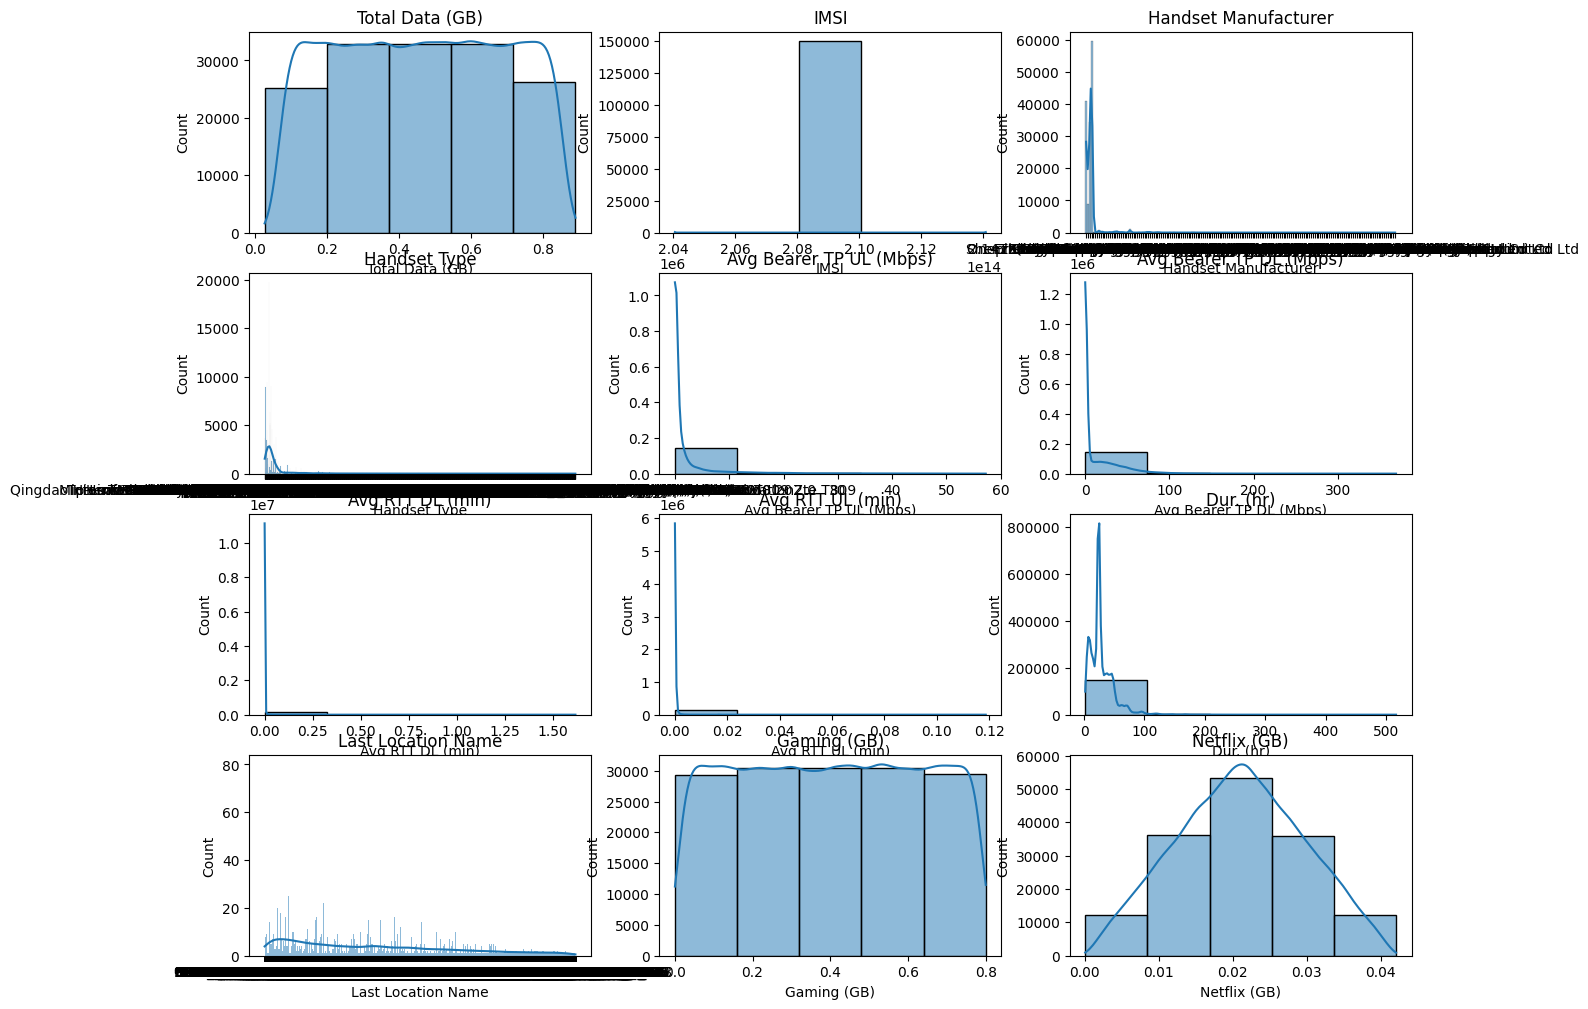

In [32]:
# Create a figure and axis for subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))

# Plotting options for each variable
for i, col in enumerate(df_relevant.columns):
    ax = axes[i // 3, i % 3]
    if col == 'Dur. (hr)':
        sns.histplot(df_relevant[col], ax=ax, bins=5, kde=True)
    elif col.startswith('Avg RTT'):
        sns.histplot(df_relevant[col], ax=ax, bins=5, kde=True)
    elif col.endswith('(Mbps)'):
        sns.histplot(df_relevant[col], ax=ax, bins=5, kde=True)
    elif col.endswith('(min)'):
        sns.histplot(df_relevant[col], ax=ax, bins=5, kde=True)
    elif col.endswith('(GB)'):
        sns.histplot(df_relevant[col], ax=ax, bins=5, kde=True)
    else:
        sns.histplot(df_relevant[col], ax=ax, bins=5, kde=True)
    ax.set_title(col)

# Adjust layout
plt.tight_layout()
plt.show()

#### Aggregating User Behavior Data

In [ ]:
print(df.columns.tolist())

# Step 1: Group by user
grouped_data = df.groupby('IMSI')

# Step 2: Compute aggregates
user_behavior_summary = grouped_data.agg({
    'Bearer Id': 'count',
    'Dur. (ms).1': 'sum',
    'Total DL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum',
    'Social Media DL (Bytes)': 'sum',
    'Google DL (Bytes)': 'sum',
    'Email DL (Bytes)': 'sum',
    'Youtube DL (Bytes)': 'sum',
    'Netflix DL (Bytes)': 'sum',
    'Gaming DL (Bytes)': 'sum',
    'Other DL (Bytes)': 'sum',
})

# Display the aggregated user behavior data
print(user_behavior_summary.head())  # You can adjust the number of rows to display
user_behavior_summary.head(10)


In [ ]:
# Apply conversion functions to columns and store results in new columns
df['Total DL (GB)'] = df['Total DL (Bytes)'].apply(bytes_to_gigabytes)
df['Total UL (GB)'] = df['Total UL (Bytes)'].apply(bytes_to_gigabytes)
df['Social Media DL (GB)'] = df['Social Media DL (Bytes)'].apply(bytes_to_gigabytes)
df['Social Media UL (GB)'] = df['Social Media UL (Bytes)'].apply(bytes_to_gigabytes)
df['Google DL (GB)'] = df['Google DL (Bytes)'].apply(bytes_to_gigabytes)
df['Google UL (GB)'] = df['Google UL (Bytes)'].apply(bytes_to_gigabytes)
df['Email DL (GB)'] = df['Email DL (Bytes)'].apply(bytes_to_gigabytes)
df['Email UL (GB)'] = df['Email UL (Bytes)'].apply(bytes_to_gigabytes)
df['Youtube DL (GB)'] = df['Youtube DL (Bytes)'].apply(bytes_to_gigabytes)
df['Youtube UL (GB)'] = df['Youtube UL (Bytes)'].apply(bytes_to_gigabytes)
df['Netflix DL (GB)'] = df['Netflix DL (Bytes)'].apply(bytes_to_gigabytes)
df['Netflix UL (GB)'] = df['Netflix UL (Bytes)'].apply(bytes_to_gigabytes)
df['Gaming DL (GB)'] = df['Gaming DL (Bytes)'].apply(bytes_to_gigabytes)
df['Gaming UL (GB)'] = df['Gaming UL (Bytes)'].apply(bytes_to_gigabytes)
df['Other DL (GB)'] = df['Other DL (Bytes)'].apply(bytes_to_gigabytes)
df['Other UL (GB)'] = df['Other UL (Bytes)'].apply(bytes_to_gigabytes)
df['Dur. (hr)'] = df['Dur. (ms).1'].apply(milliseconds_to_hours)

# Step 1: Group by user
grouped_data = df.groupby('IMSI')

# Step 2: Compute aggregates
user_behavior_summary = grouped_data.agg({
    'Bearer Id': 'count',
    'Dur. (hr)': 'sum',
    'Total DL (GB)': 'sum',
    'Total UL (GB)': 'sum',
    'Social Media DL (GB)': 'sum',
    'Social Media UL (GB)': 'sum',
    'Google DL (GB)': 'sum',
    'Google UL (GB)': 'sum',
    'Email DL (GB)': 'sum',
    'Email UL (GB)': 'sum',
    'Youtube DL (GB)': 'sum',
    'Youtube UL (GB)': 'sum',
    'Netflix DL (GB)': 'sum',
    'Netflix UL (GB)': 'sum',
    'Gaming DL (GB)': 'sum',
    'Gaming UL (GB)': 'sum',
    'Other DL (GB)': 'sum',
    'Other UL (GB)': 'sum',
})

# Display the aggregated user behavior data
print(user_behavior_summary.head())  # You can adjust the number of rows to display
user_behavior_summary.head(10)

In [ ]:
# Calculate total data volume (DL+UL) for each application
user_behavior_summary['Total Social Media Data (GB)'] = user_behavior_summary['Social Media DL (GB)'] + user_behavior_summary['Social Media UL (GB)']
user_behavior_summary['Total YouTube Data (GB)'] = user_behavior_summary['Youtube DL (GB)'] + user_behavior_summary['Youtube UL (GB)']
user_behavior_summary['Total Email Data (GB)'] = user_behavior_summary['Email DL (GB)'] + user_behavior_summary['Email UL (GB)']
user_behavior_summary['Total Gaming Data (GB)'] = user_behavior_summary['Gaming DL (GB)'] + user_behavior_summary['Gaming UL (GB)']
user_behavior_summary['Total Netflix Data (GB)'] = user_behavior_summary['Netflix DL (GB)'] + user_behavior_summary['Netflix UL (GB)']
user_behavior_summary['Total Google Data (GB)'] = user_behavior_summary['Google DL (GB)'] + user_behavior_summary['Google UL (GB)']
user_behavior_summary['Total Other Data (GB)'] = user_behavior_summary['Other DL (GB)'] + user_behavior_summary['Other UL (GB)']
user_behavior_summary['Total Data (GB)'] = user_behavior_summary['Total DL (GB)'] + user_behavior_summary['Total UL (GB)']

# Display the aggregated DataFrame
print(user_behavior_summary['Total Social Media Data (GB)'])
user_behavior_summary.sort_values(by='Total Data (GB)', ascending=False).head()

In [ ]:
# Number of users 
unique_rows = df.drop_duplicates(subset=['IMSI'])
users_count = unique_rows['IMSI'].count()
print(users_count)

#### Exploratory Data Analysis (EDA)